<a href="https://colab.research.google.com/github/abhijeet06793/Deep_Learning/blob/master/Predict_ImageClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MobileNet

**MobileNet** - Its a lightweight Deep CNN network which is smaller and lighter in size than the well known models.
Mobilenet is a class of low power low latency that can be used for classification, detection and other common CNN that are good for.Band on their small size, theya are considered great deep learning model to be used for Mobile devices.

Note - The size of RAM that Mobilenet occupies is only 17 mb as compared to VGG16 which occupies around 500 mb RAM size. This is beacuse of the amount of weights and biases that we have to laod for VGG16. The VGG16 has 138 milling parameters while the MobileNet has 4.2 million parameters only.

In [5]:
#Importing libraries

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Dropout, Dense, Conv2D, MaxPool2D, Flatten, Reshape
from tensorflow.keras.optimizers import Adam, Adadelta, SGD
from tensorflow.keras.activations import relu
from tensorflow.keras.initializers import glorot_normal, glorot_uniform, he_normal, he_uniform, HeNormal, HeUniform
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import confusion_matrix
import os
import random
import re
import shutil

import warnings
warnings.filterwarnings("ignore")

### MobileNet Prediction

In [3]:
mobilenet_model = tf.keras.applications.mobilenet.MobileNet()
mobilenet_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [6]:
# In order to pass the images to Mobilenet we have to do some preprocessing first.

def preprocessing_for_mobilenet(image_file):
  image_path = '/content/'
  image = load_img(image_path + image_file, target_size=(224, 224))
  image_array = img_to_array(image)
  image_array_expanded_dim = image_array.reshape((1, 224, 224, 3))
  processed_per_mobilenet = tf.keras.applications.mobilenet.preprocess_input(image_array_expanded_dim)
  #For mobilenet the preprocessing is scaling the image to [-1,+1] instead of 0-255

  return processed_per_mobilenet


In [20]:
#Uploading an image to colab 

from google.colab import files
files.upload()

Saving tiger.jfif to tiger.jfif


{'tiger.jfif': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\t\x06\x07\x13\x13\x12\x15\x13\x13\x14\x16\x15\x15\x17\x18\x1e\x1a\x17\x18\x17\x18\x15\x1f\x17\x1b\x17\x1a\x18\x18\x17\x18\x1a\x16\x18\x18\x1d( \x18\x1f%\x1d\x17\x18!1"%)+...\x1a\x1f383-7(-.+\x01\n\n\n\x0e\r\x0e\x1b\x10\x10\x1b-%\x1f%---+-+--------------------------------------------\xff\xc0\x00\x11\x08\x00\xb1\x01\x1c\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x00\x02\x02\x03\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x05\x03\x06\x00\x01\x02\x07\xff\xc4\x00A\x10\x00\x01\x03\x03\x02\x03\x05\x06\x03\x07\x03\x04\x01\x05\x00\x00\x01\x02\x03\x11\x00\x04!\x121\x05AQ\x06\x13"aq2B\x81\x91\xa1\xb1\xc1\xd1\xf0\x07\x14#3Rbr4\x82\xe1\x15$\x92\xf1C5Ss\x83\xa2\xff\xc4\x00\x1a\x01\x00\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x03\x04\x01\x00\x05\x06\xff\xc4\x00,\x11\x00\x02\x02\x02\x02\x02\x02\x01\x02\x05\x05\x00\x00\x00\x00\x00\x00\x01\x02\x11\x03!\x1

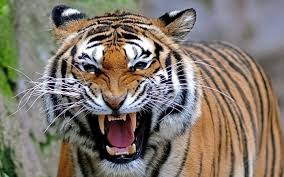

In [21]:
#Displaying the image first

from IPython.display import Image
Image(filename ='/content/tiger.jfif',format='png')

In [25]:
processed_image = preprocessing_for_mobilenet('tiger.jfif')
prediction = mobilenet_model.predict(processed_image) #This return the prediction class according to image net dataset.

print("No of classes predicted :",len(prediction[0]))

No of classes predicted : 1000


In [26]:
# Check the class of prediction from imagenet utils. 
tf.keras.applications.imagenet_utils.decode_predictions(preds= prediction, top=5)

[[('n02129604', 'tiger', 0.9908529),
  ('n02123159', 'tiger_cat', 0.0077086566),
  ('n02127052', 'lynx', 0.00084201363),
  ('n02128385', 'leopard', 0.00035875343),
  ('n02128925', 'jaguar', 0.00016727668)]]

### RESNET prediction - Residual Network

In [49]:
resnet_model = tf.keras.applications.resnet.ResNet50()

resnet_model.summary()

102973440/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_7[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
________________________

In [50]:
# In order to pass the images to Mobilenet we have to do some preprocessing first.

def preprocessing_for_RESNET(image_file):
  image_path = '/content/'
  image = load_img(image_path + image_file, target_size=(224, 224))
  image_array = img_to_array(image)
  image_array_expanded_dim = image_array.reshape((1, 224, 224, 3))
  processed_per_resnet = tf.keras.applications.resnet.preprocess_input(image_array_expanded_dim)
  #For VGG19 the preprocessing is subtracting the mean value of every channel to each pixel from the channel.

  return processed_per_resnet


In [53]:
processed_image_resnet = preprocessing_for_RESNET('tiger.jfif')
prediction_resnet = resnet_model.predict(processed_image_resnet) #This return the prediction class according to image net dataset.

# Check the class of prediction from imagenet utils. 
tf.keras.applications.imagenet_utils.decode_predictions(preds= prediction_resnet, top=5)

[[('n02129604', 'tiger', 0.9757051),
  ('n02123159', 'tiger_cat', 0.024273314),
  ('n02128925', 'jaguar', 1.3280746e-05),
  ('n02127052', 'lynx', 5.7400516e-06),
  ('n02128385', 'leopard', 1.4260089e-06)]]